In [ ]:
!pip install -U scikit-learn pandas matplotlib

In [19]:
#load Data_test using scipy
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd

train=sio.loadmat('Data_Train.mat')
label=sio.loadmat('Label_Train.mat')

final_pred=sio.loadmat('Data_test.mat')

In [20]:
#convert to panda dataframe
train=pd.DataFrame(train['Data_Train'])
label=pd.DataFrame(label['Label_Train'])
final_pred=pd.DataFrame(final_pred['Data_test'])

In [21]:
train['label']=label
train_1=train[train['label']==1]
train_2=train[train['label']==2]
train_3=train[train['label']==3]

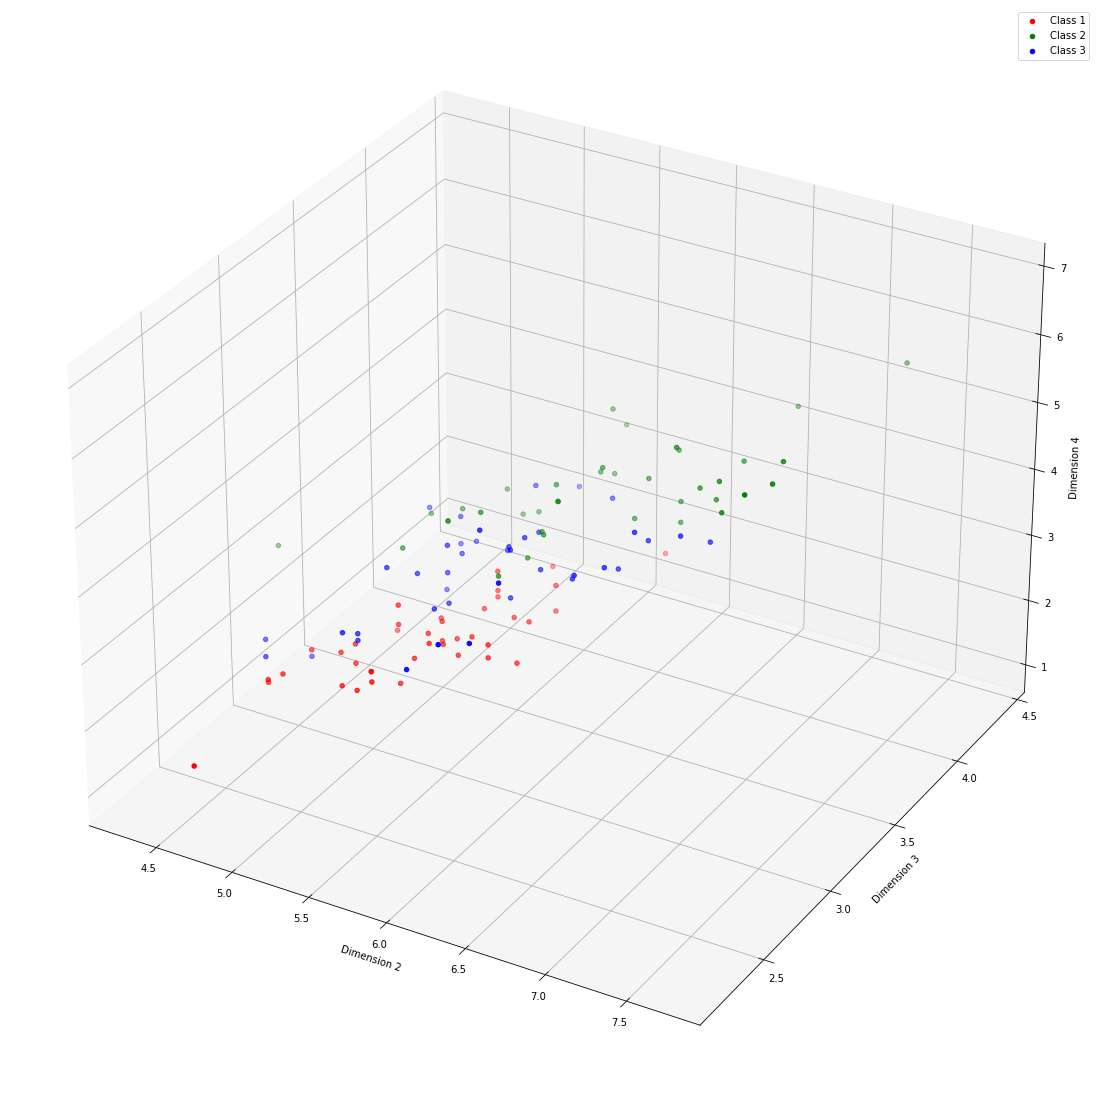

In [22]:
#plot the data in 3D
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_1[0], train_1[1], train_1[2], marker='o', color='red')
ax.scatter(train_2[0], train_2[1], train_2[2], marker='o', color='green')
ax.scatter(train_3[0], train_3[1], train_3[2], marker='o', color='blue')
ax.set_xlabel('Dimension 2')
ax.set_ylabel('Dimension 3')
ax.set_zlabel('Dimension 4')
ax.legend(['Class 1', 'Class 2', 'Class 3'])

plt.show()

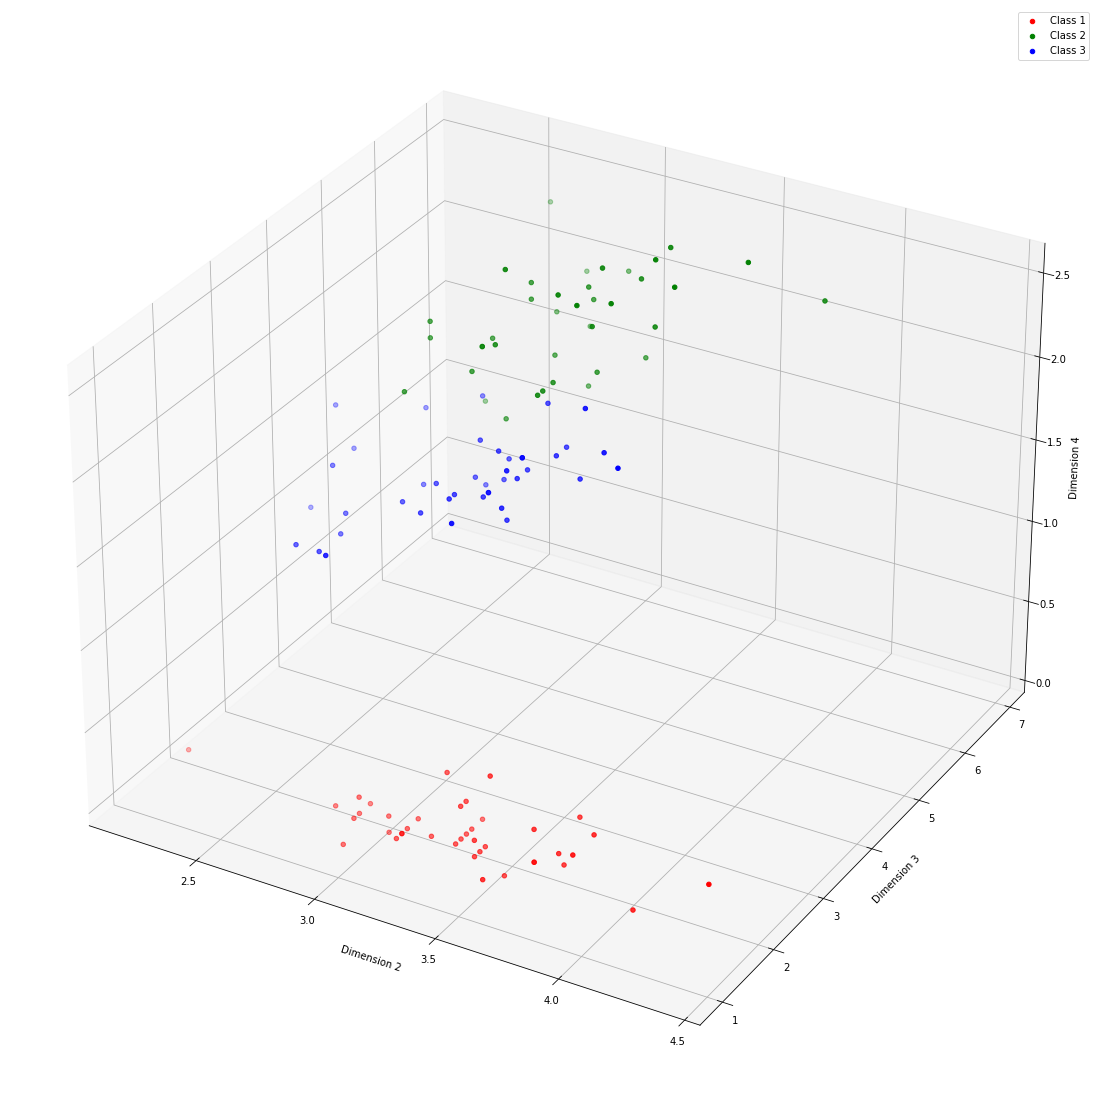

In [23]:
#plot the data in 3D
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_1[1], train_1[2], train_1[3], marker='o', color='red')
ax.scatter(train_2[1], train_2[2], train_2[3], marker='o', color='green')
ax.scatter(train_3[1], train_3[2], train_3[3], marker='o', color='blue')
ax.set_xlabel('Dimension 2')
ax.set_ylabel('Dimension 3')
ax.set_zlabel('Dimension 4')
ax.legend(['Class 1', 'Class 2', 'Class 3'])

plt.show()

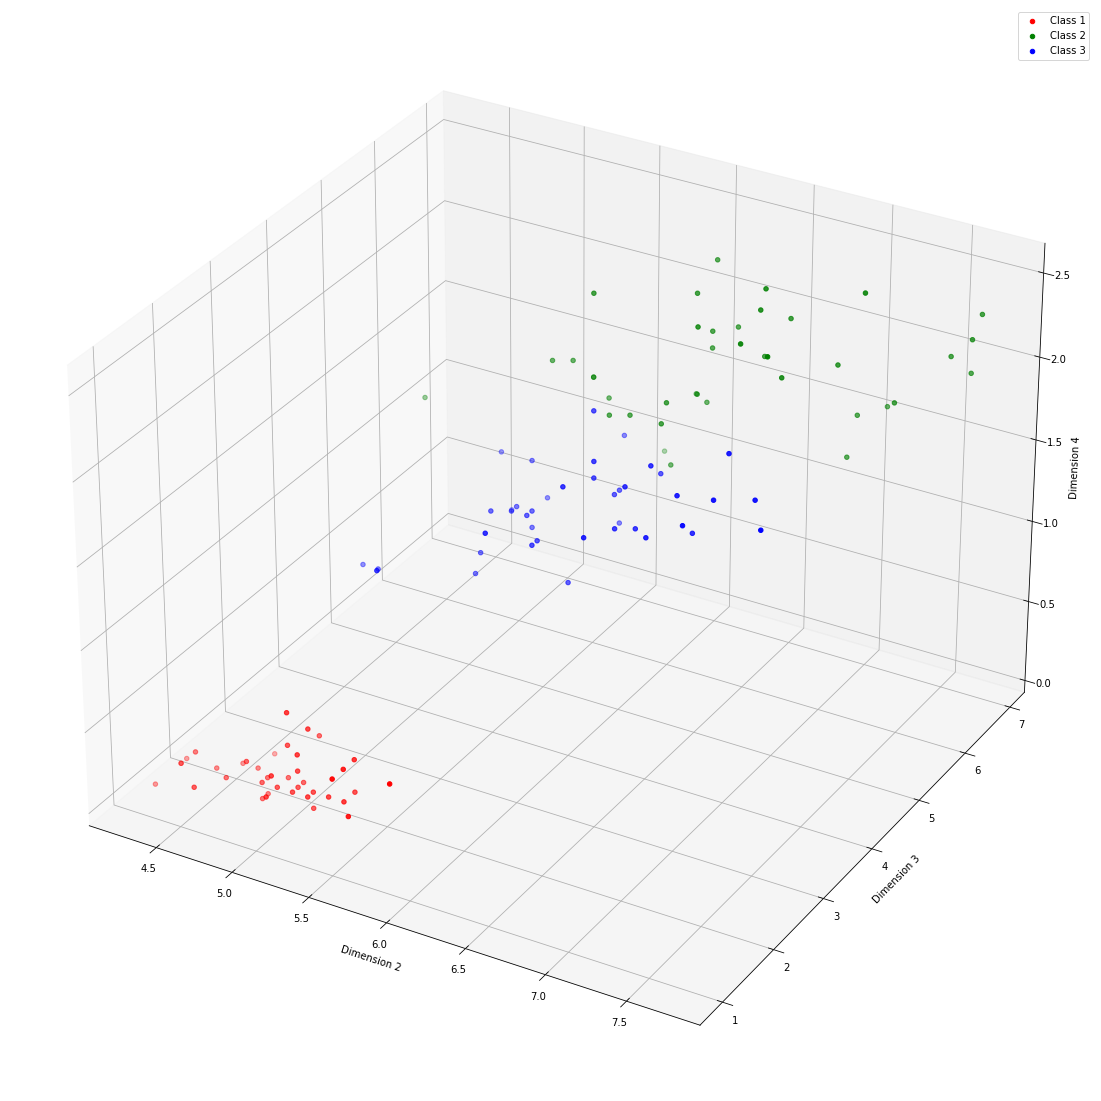

In [24]:
#plot the data in 3D
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_1[0], train_1[2], train_1[3], marker='o', color='red')
ax.scatter(train_2[0], train_2[2], train_2[3], marker='o', color='green')
ax.scatter(train_3[0], train_3[2], train_3[3], marker='o', color='blue')
ax.set_xlabel('Dimension 2')
ax.set_ylabel('Dimension 3')
ax.set_zlabel('Dimension 4')
ax.legend(['Class 1', 'Class 2', 'Class 3'])

plt.show()

In [25]:
train=sio.loadmat('Data_Train.mat')
label=sio.loadmat('Label_Train.mat')
final_pred=sio.loadmat('Data_test.mat')
train=pd.DataFrame(train['Data_Train'])
label=pd.DataFrame(label['Label_Train'])
final_pred=pd.DataFrame(final_pred['Data_test'])

In [26]:
#use sklearn to design an gaussian naive bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,label,test_size=0.2,random_state=0)


In [27]:
gnb = GaussianNB()
y_pred_gaussian = gnb.fit(x_train, y_train).predict(final_pred)
print(f'Accuracy of the model is {gnb.score(x_test, y_test)}')

Accuracy of the model is 0.9583333333333334


S:\Anaconda\envs\6227\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
y_pred_gaussian

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

In [29]:
final_pred_bayes = final_pred
final_pred_bayes['y_pred_gaussian']=y_pred_gaussian
#output final_pred to csv
final_pred_bayes.to_csv('final_pred_bayes.csv')
final_pred=sio.loadmat('Data_test.mat')
final_pred=pd.DataFrame(final_pred['Data_test'])
final_pred_bayes

,0,1,2,3,y_pred_gaussian
0,4.8,3.1,1.6,0.2,1
1,5.1,3.5,1.4,0.3,1
2,4.8,3.0,1.4,0.1,1
3,5.7,3.8,1.7,0.3,1
4,5.5,4.2,1.4,0.2,1
5,5.0,3.4,1.5,0.2,1
6,4.6,3.1,1.5,0.2,1
7,5.8,4.0,1.2,0.2,1
8,5.0,3.6,1.4,0.2,1
9,4.6,3.4,1.4,0.3,1


In [30]:
#use sklearn to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,label,test_size=0.2,random_state=0)
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(x_train, y_train)
y_pred_tree = decision_tree.predict(final_pred)
print(f'Accuracy of the model is {decision_tree.score(x_test, y_test)}')


Accuracy of the model is 0.9583333333333334


[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\ngini = 0.665\nsamples = 96\nvalue = [29, 33, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 67\nvalue = [0, 33, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 30, 1]')]

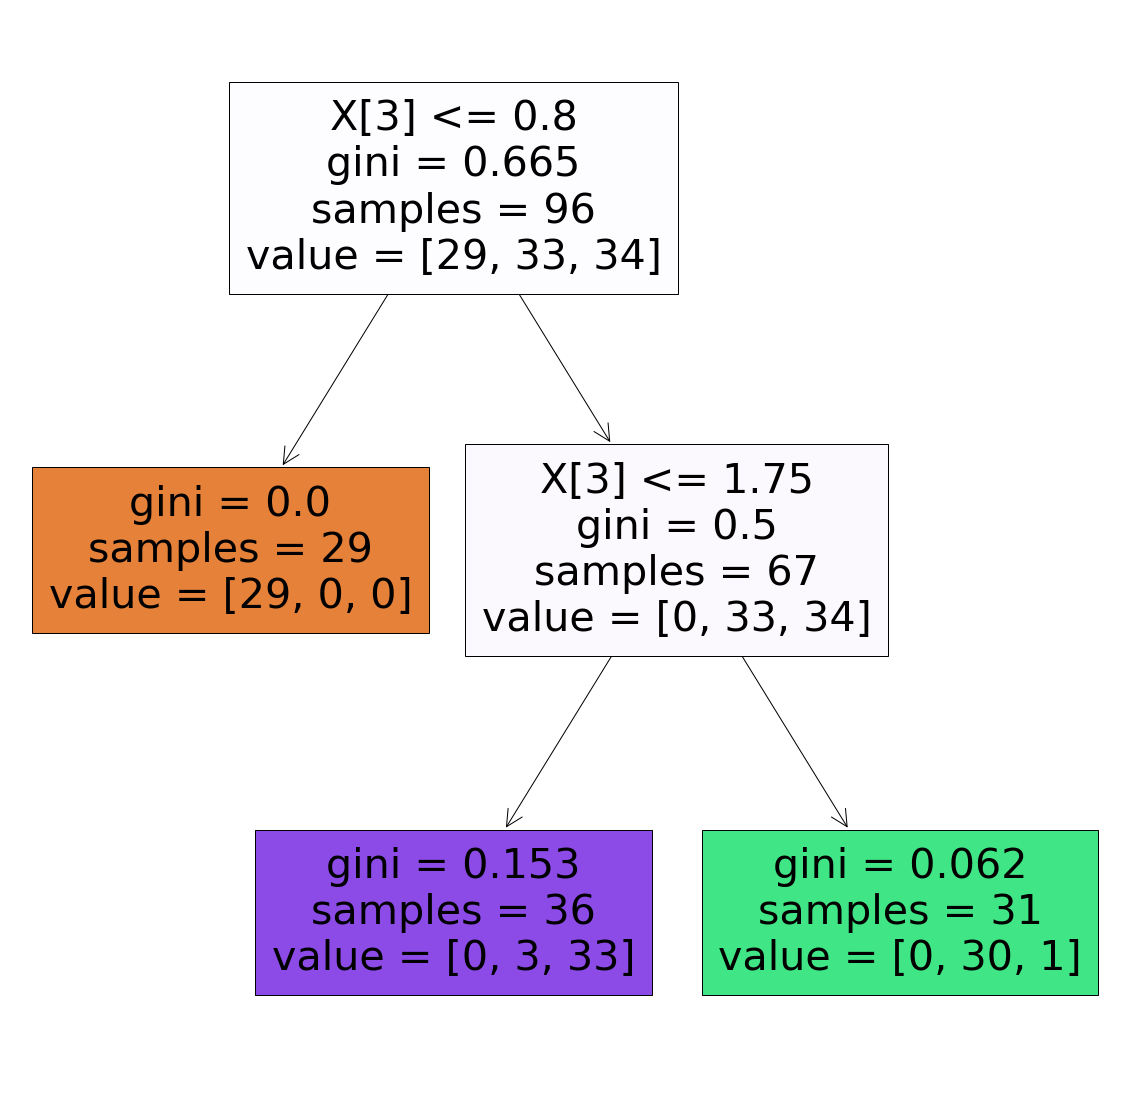

In [31]:
plt.figure(figsize=(20,20))
tree.plot_tree(decision_tree.fit(x_train, y_train), filled=True)

In [32]:
y_pred_tree

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

In [33]:
final_pred_tree = final_pred
final_pred_tree['y_pred_tree']=y_pred_tree
#output final_pred to csv
final_pred_tree.to_csv('final_pred_tree.csv')
final_pred=sio.loadmat('Data_test.mat')
final_pred=pd.DataFrame(final_pred['Data_test'])
final_pred_tree

,0,1,2,3,y_pred_tree
0,4.8,3.1,1.6,0.2,1
1,5.1,3.5,1.4,0.3,1
2,4.8,3.0,1.4,0.1,1
3,5.7,3.8,1.7,0.3,1
4,5.5,4.2,1.4,0.2,1
5,5.0,3.4,1.5,0.2,1
6,4.6,3.1,1.5,0.2,1
7,5.8,4.0,1.2,0.2,1
8,5.0,3.6,1.4,0.2,1
9,4.6,3.4,1.4,0.3,1


In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,label,test_size=0.2,random_state=0)
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_pred_fisher = lda.predict(final_pred)
#score the model
print(f'Accuracy of the model is {lda.score(x_test, y_test)}')

Accuracy of the model is 1.0


S:\Anaconda\envs\6227\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
y_pred_fisher

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

In [36]:
final_pred_fisher = final_pred
final_pred_fisher['y_pred_fisher']=y_pred_fisher
#output final_pred to csv
final_pred_fisher.to_csv('final_pred_fisher.csv')
final_pred=sio.loadmat('Data_test.mat')
final_pred=pd.DataFrame(final_pred['Data_test'])
final_pred_fisher

,0,1,2,3,y_pred_fisher
0,4.8,3.1,1.6,0.2,1
1,5.1,3.5,1.4,0.3,1
2,4.8,3.0,1.4,0.1,1
3,5.7,3.8,1.7,0.3,1
4,5.5,4.2,1.4,0.2,1
5,5.0,3.4,1.5,0.2,1
6,4.6,3.1,1.5,0.2,1
7,5.8,4.0,1.2,0.2,1
8,5.0,3.6,1.4,0.2,1
9,4.6,3.4,1.4,0.3,1
